### 多腕バンディット問題
+ 環境: スロット
+ エージェント: プレイヤー
+ 方策: 活用と探索 (ε-greedy法)
+ 報酬: あたり(1) ハズレ(0)

スロットマシンの価値（報酬の期待値) $ E[R] $
+ 行動に対する報酬の期待値(行動に対する条件付き期待値): 行動期待値 $ q(A) = E[R|A=a] $
+ 行動価値の推定値: $ Q(A) $


In [2]:
# 報酬のサンプリングから平均値(行動価値)を求める
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1, 11):
    reward = np.random.rand() # ダミーの報酬
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


行動価値の漸化式
$$ Q_{n} = Q_{n-1} + \frac{1}{n}(R_{n} - Q_{n-1}) $$
+ n無限大で $ Q_{n}=Q_{n-1} $

In [3]:
Q = 0
for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n # Q += (reward - Q) / 2
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


プレイヤーの戦略
+ 活用: greedyな行動. つまり, 過去の経験をもとに同じことを繰り返す
+ 探索: 新しい試行をする

In [4]:
# 10台のスロットを考える
# 各スロットには，当たりの確率と外れの確率が付与されている
# スロットのをプレイした経験をもとに勝率の高いｓスロットを探すことが目標

import numpy as np

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms) # 各マシンの勝率

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [5]:
# 0番目のスロットマシンを3回プレイ
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

1
1
1


In [6]:
# 0番目のスレットマシンの価値推定を行う
bandit = Bandit()
Q = 0
for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


10台のスレットマシンそれぞれの価値の推定をお行う

In [7]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10) # ランダムにスロットマシンを選ぶ
    reward = bandit.play(arm=action)
    ns[action] += 1
    Qs[action] += (reward - Q) / ns[action]
    print(Qs)

[ 0.  -0.6  0.   0.   0.   0.   0.   0.   0.   0. ]
[ 0.  -0.6  0.   0.4  0.   0.   0.   0.   0.   0. ]
[ 0.  -0.6  0.   0.4  0.   0.4  0.   0.   0.   0. ]
[ 0.  -0.9  0.   0.4  0.   0.4  0.   0.   0.   0. ]
[ 0.  -0.9 -0.6  0.4  0.   0.4  0.   0.   0.   0. ]
[ 0.  -0.9 -0.6  0.6  0.   0.4  0.   0.   0.   0. ]
[-0.6 -0.9 -0.6  0.6  0.   0.4  0.   0.   0.   0. ]
[-0.6 -0.9 -0.6  0.6  0.   0.4  0.   0.   0.   0.4]
[-0.6 -0.9 -0.9  0.6  0.   0.4  0.   0.   0.   0.4]
[-0.6 -0.9 -0.9  0.6  0.   0.4  0.  -0.6  0.   0.4]


In [8]:
# エージェント
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        """行動価値の推定

        Args:
            action (_type_): _description_
            reward (_type_): _description_
        """
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        """方策
            活用と探索
        Returns:
            _type_: _description_
        """
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 探索
        return np.argmax(self.Qs) # 活用    

プレイヤーにスロットマシンを動かす行動を1000回させて, 報酬がどのような推移になるかチェック

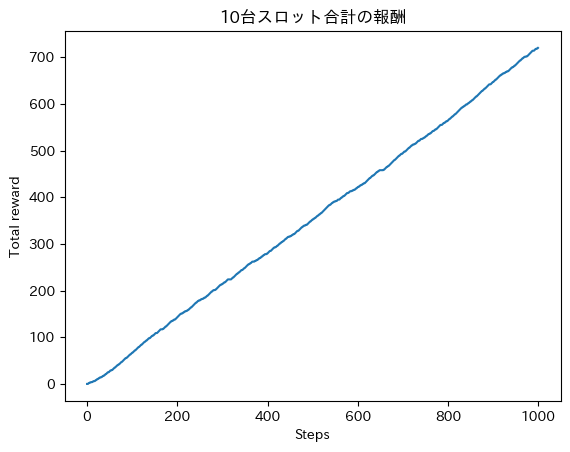

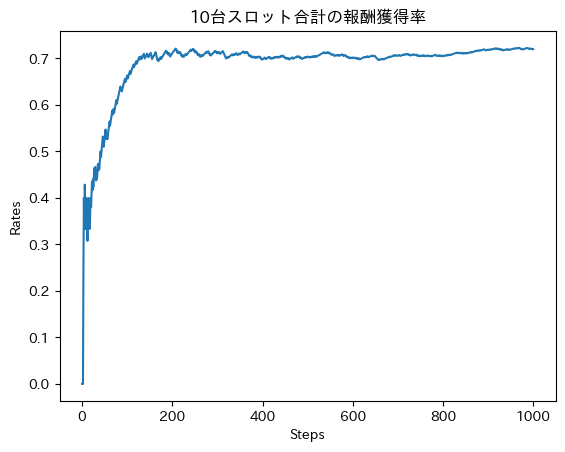

In [14]:
import matplotlib.pyplot as plt
import matplotlib_inline
import japanize_matplotlib

steps = 1000
epsilon = 0.1

def rl_trial(steps, epsilon):

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []
    rates = []

    for step in range(steps):
        action = agent.get_action()  # 1. 行動を選ぶ
        reward = bandit.play(action) # 2. 実際にプレイして報酬を得る
        agent.update(action, reward) # 3. 行動と報酬から学ぶ(報酬から算出された行動価値に基づいて次の行動を決定する)
        total_reward += reward

        total_rewards.append(total_reward)
        rates.append(total_reward / (step+1))

    return total_rewards, rates

total_rewards, rates = rl_trial(steps, epsilon)

plt.title('10台スロット合計の報酬')
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.title('10台スロット合計の報酬獲得率')
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()


強化学習はランダム性があるので各試行で学習プロセスが異なる

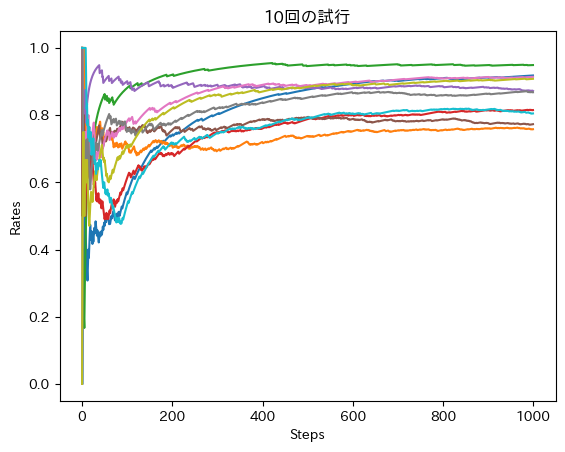

In [16]:
trial = 10
steps = 1000
epsilon = 0.1
all_rates = np.zeros((trial, steps))

plt.title('10回の試行')
plt.ylabel('Rates')
plt.xlabel('Steps')

for run in range(trial):
    _, rates = rl_trial(steps, epsilon)
    plt.plot(rates)

plt.show()

アルゴリズムの平均的な評価(試行を繰り返す)
+ 強化学習にはランダム性があるので，一回の評価はNG

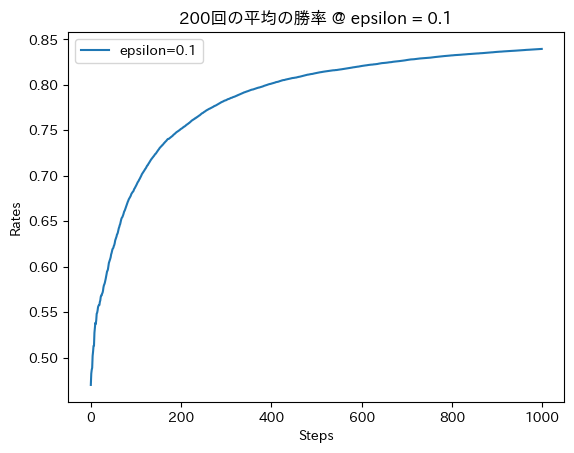

In [21]:
epsilon = 0.1

def evalulate(epsilon):

    runs = 200
    steps = 1000
    all_rates = np.zeros((runs, steps))

    for run in range(runs):
        _, rates = rl_trial(steps, epsilon)
        all_rates[run] = rates # 1. 報酬の結果を記録

    avg_rates = np.average(all_rates, axis=0) # 各ステップにおける平均を求める

    plt.title(f'200回の平均の勝率 @ epsilon = {epsilon:.1f}')
    plt.ylabel('Rates')
    plt.xlabel('Steps')
    plt.plot(avg_rates, label=f"epsilon={epsilon}")
    plt.legend()
    

evalulate(epsilon)
plt.show()

$ \epsilon$ - greedy 法

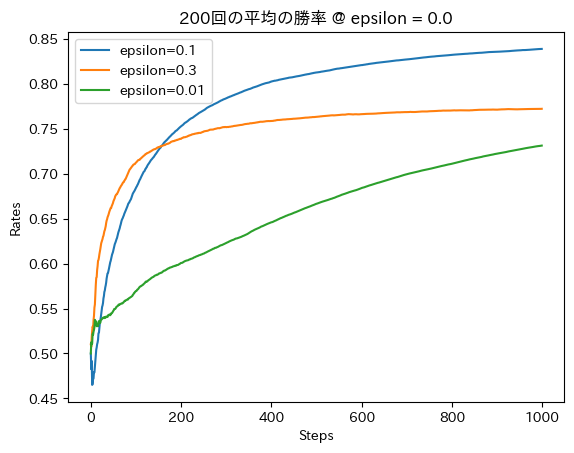

In [22]:
epsilons = [0.1, 0.3, 0.01]

for eps in epsilons:
    evalulate(epsilon=eps)

plt.show()

### 定常問題と非定常問題
+ 定常問題: 報酬の確率分布が定常
+ 非定常問題: 報酬の確率分布がエージェントの行動によって変化する

In [23]:
# 非定常なスロット
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms) # [0,1] の勝率を各スロットに付与

    def play(self, arm):
        rate = self.rates[arm]
        # 行動するごとに報酬の確率分布が変わる
        self.rates += 0.1 * np.random.randn(self.arms) # 各すロッドの勝率にノイズを付与
        if rate > np.random.rand():
            return 1
        else:
            return 0


行動価値関数の $\frac{1}{n}$ を固定値 $\alpha$ に固定した場合, 過去の報酬に対する重みが指数減衰する
$$ Q_{n} = Q_{n-1} + \alpha(R_{n} - Q_{n-1}) $$
$$ Q_{n} = \alpha R_{n} + \alpha(1 - \alpha) R_{n-1} + \cdots + \alpha (1 - \alpha)^{n-1} R_{1} + (1 - \alpha)^{n} Q_{0} $$
+ 注意点は, $Q_{0}$ があり,問題に対するハイパーパラメータで，初期値依存がある

### 非定常問題を解く

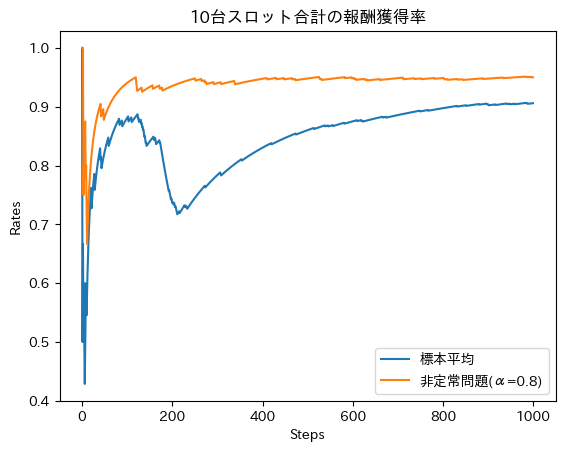

In [27]:
# 推定値を固定値αで固定するだけ
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions = 10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        # alphaで更新
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)
    

# エージェント
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        """行動価値の推定

        Args:
            action (_type_): _description_
            reward (_type_): _description_
        """
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        """方策
            活用と探索
        Returns:
            _type_: _description_
        """
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs)) # 探索
        return np.argmax(self.Qs) # 活用  
    

bandit = NonStatBandit()
# bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()  # 1. 行動を選ぶ
    reward = bandit.play(action) # 2. 実際にプレイして報酬を得る
    agent.update(action, reward) # 3. 行動と報酬から学ぶ(報酬から算出された行動価値に基づいて次の行動を決定する)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))


plt.plot(rates, label=f"標本平均")


bandit = NonStatBandit()
agent = AlphaAgent(epsilon, alpha=0.8)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()  # 1. 行動を選ぶ
    reward = bandit.play(action) # 2. 実際にプレイして報酬を得る
    agent.update(action, reward) # 3. 行動と報酬から学ぶ(報酬から算出された行動価値に基づいて次の行動を決定する)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

plt.plot(rates, label=f"非定常問題(α=0.8)")



plt.title('10台スロット合計の報酬獲得率')
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.legend()
plt.show()